In [420]:
import pandas as pd 
import datetime
import numpy as np
from tqdm import tqdm


path = r'C:\Users\User\Documents\3A\challenge\Accidentologie\data\accidents_velos.csv'

accident_df = pd.read_csv(path, sep = ";")


In [421]:
nb_veh_df = accident_df.groupby('Num_Acc').id_vehicule.nunique()
accident_df = pd.merge(accident_df, nb_veh_df, how="inner", on=["Num_Acc"])
accident_df = accident_df.rename(columns={"id_vehicule_y": "Nb_veh"})
accident_df = accident_df[accident_df['catv'] == 1]
accident_df = accident_df.drop(['col','dep','Num_Acc','catv','senc','id_vehicule_x','v1','v2','occutc', 'lartpc','pr','pr1', 'num_veh', 'place','catu', 'locp', 'actp', 'etatp','adr', 'voie','motor','larrout','com','choc'], axis = 1)


In [422]:
def process_date(df):
    date = []
    for index, row in df.iterrows():
        li = row['hrmn'].split(':')
        h,m = int(li[0]), int(li[1])
        dt = datetime.datetime(int(row['an']),int(row['mois']),int(row['jour']),h,m)
        date.append(dt)
    df['date'] = date
    return df

accident_df = process_date(accident_df)
accident_df = accident_df.drop(['jour','mois','an','hrmn'], axis = 1)


In [423]:
def columns_secu(df):
    df['casque'] = np.where(df.secu1 == 2   ,1 , 0)
    df['gilet2'] = np.where(df.secu2 == 4, 1 , 0)
    df['gilet1'] = np.where(df.secu1 == 4,1 , 0)
    df['gilet3'] = np.where(df.secu3 == 4,1 , 0)
    df['gilet'] = df['gilet1'] + df['gilet2'] + df['gilet3']
    df = df.drop(['secu1','secu2','secu3','gilet1', 'gilet2','gilet3'], axis = 1)

    return df

In [424]:
accident_df = columns_secu(accident_df)

In [425]:
def preprocessing_using_OneHotEncoding(df):
    categorical_features = ["grav","sexe","trajet","lum","agg",'atm','vosp']
    #df_categorical_features = df[categorical_features]
    df = pd.get_dummies(data = df, columns = categorical_features)
    #df = pd.concat([df, df_categorical_features], axis=1)
    to_drop = ['grav_-1','sexe_-1', 'trajet_-1','trajet_0','trajet_9','atm_-1', 'atm_1','atm_9','vosp_-1','vosp_0','vosp_3']
    df = df.drop(to_drop, axis = 1)
    df = df.rename(columns={"grav_1": "indemne", "grav_2": "mort", "grav_3": "blesse_grave", "grav_4": "blesse_leger", "sexe_1":"Homme", "sexe_2":"Femme","trajet_2":"trajet_travail","trajet_1":"trajet_ecole", "trajet_3":"trajet_course","trajet_4":"trajet_pro","trajet_5":"trajet_loisir","lum_1":"lum_plein_jour","lum_2":"lum_aube_crepu","lum_3":"lum_nuit_sans_ep","lum_4":"lum_nuit_epna","lum_5":"lum_nuit_epa","atm_2":"pluie_leg","atm_3":"pluie_forte","atm_4":"neige","atm_5":"brouillard","atm_7":"atm_eblouissant", "atm_6":"vent_fort","atm_8":"temps_couvert","agg_2":"agglo",'agg_1':"hors_agglo",'vosp_2':'bande_cycl','vosp_1':'piste_cycl'})
    return df

In [426]:
accident_df = preprocessing_using_OneHotEncoding(accident_df)

In [427]:
to_drop = ['obs','obsm','manv', 'catr','circ','prof','plan', 'infra','situ','int']
accident_df = accident_df.drop(to_drop, axis = 1)
accident_df.columns

Index(['an_nais', 'nbv', 'surf', 'vma', 'lat', 'long', 'Nb_veh', 'date',
       'casque', 'gilet', 'indemne', 'mort', 'blesse_grave', 'blesse_leger',
       'Homme', 'Femme', 'trajet_ecole', 'trajet_travail', 'trajet_course',
       'trajet_pro', 'trajet_loisir', 'lum_plein_jour', 'lum_aube_crepu',
       'lum_nuit_sans_ep', 'lum_nuit_epna', 'lum_nuit_epa', 'hors_agglo',
       'agglo', 'pluie_leg', 'pluie_forte', 'neige', 'brouillard', 'vent_fort',
       'atm_eblouissant', 'temps_couvert', 'piste_cycl', 'bande_cycl'],
      dtype='object')

In [400]:
accident_df.to_csv('accident.csv')

In [428]:
accident_grave_df = accident_df
accident_grave_df["accident_grave"] = accident_df['mort'] + accident_df['blesse_grave']
accident_grave_df = accident_grave_df[accident_grave_df['accident_grave'] == 1]
to_drop = ['indemne','blesse_leger','accident_grave']
accident_grave_df = accident_grave_df.drop(to_drop, axis = 1)
len(accident_grave_df)

4481

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# stats on datas
def print_stats(df): 
    stats_df = pd.DataFrame({
        "min":df.min(numeric_only = True), 
        "max":df.max(numeric_only = True), 
        "mean":df.mean(numeric_only = True),
        "std":df.std(numeric_only = True),
        "median":df.median(numeric_only = True),
        "nunique":df.nunique(), 
        "count_na": df.isna().sum()  
    })
    return stats_df

def count_1(df):
    for column in df.columns:
        #print(df[column].value_counts())
        sub_df = df[ df[column] == -1 ]
        print(column, ':', len(sub_df)/len(accident_df))
    return



In [405]:
stats = print_stats(accident_df)
stats

,min,max,mean,std,median,nunique,count_na
Femme,0.0,1.0,0.247428,0.431530,0.0,2,0
Homme,0.0,1.0,0.752572,0.431530,1.0,2,0
Nb_veh,1.0,20.0,1.850898,0.839314,2.0,10,0
accident_grave,0.0,1.0,0.272816,0.445421,0.0,2,0
agglo,0.0,1.0,0.829102,0.376431,1.0,2,0
an_nais,1900.0,2020.0,1979.114581,20.235881,1981.0,99,0
atm_eblouissant,0.0,1.0,0.027823,0.164472,0.0,2,0
bande_cycl,0.0,1.0,0.053577,0.225188,0.0,2,0
blesse_grave,0.0,1.0,0.237565,0.425604,0.0,2,0
blesse_leger,0.0,1.0,0.658995,0.474061,1.0,2,0


In [33]:
count_1(accident_df)

Num_Acc : 0.0
grav : 6.848376934666484e-05
sexe : 0.013559786330639638
an_nais : 0.0
trajet : 0.016915491028626217
secu1 : 0.013251609368579647
secu2 : 0.33327626352554446
secu3 : 0.9938364607588002
senc : 0.002020271195726613
catv : 0.0
obs : 0.00013696753869332968
obsm : 0.0005136282700999863
manv : 0.0003081769620599918
catr : 0.0
circ : 0.058485139022051776
nbv : 0.00962196959320641
vosp : 0.009930146555266401
prof : 0.00020545130803999452
plan : 0.00020545130803999452
surf : 0.00023969319271332693
infra : 0.05071223120120531
situ : 0.0007875633474866457
vma : 0.016162169565812904
lum : 0.0
dep : 0.0
agg : 0.0
int : 0.0
atm : 6.848376934666484e-05
col : 0.020956033420079442
lat : 0.0
long : 0.0
date : 0.0


In [266]:

def heat_map(df,figsize=(20,20)):
    corr = df.corr() #Matrice
    plt.figure(figsize=figsize)
    sns.heatmap(corr,annot=True,cmap="coolwarm")

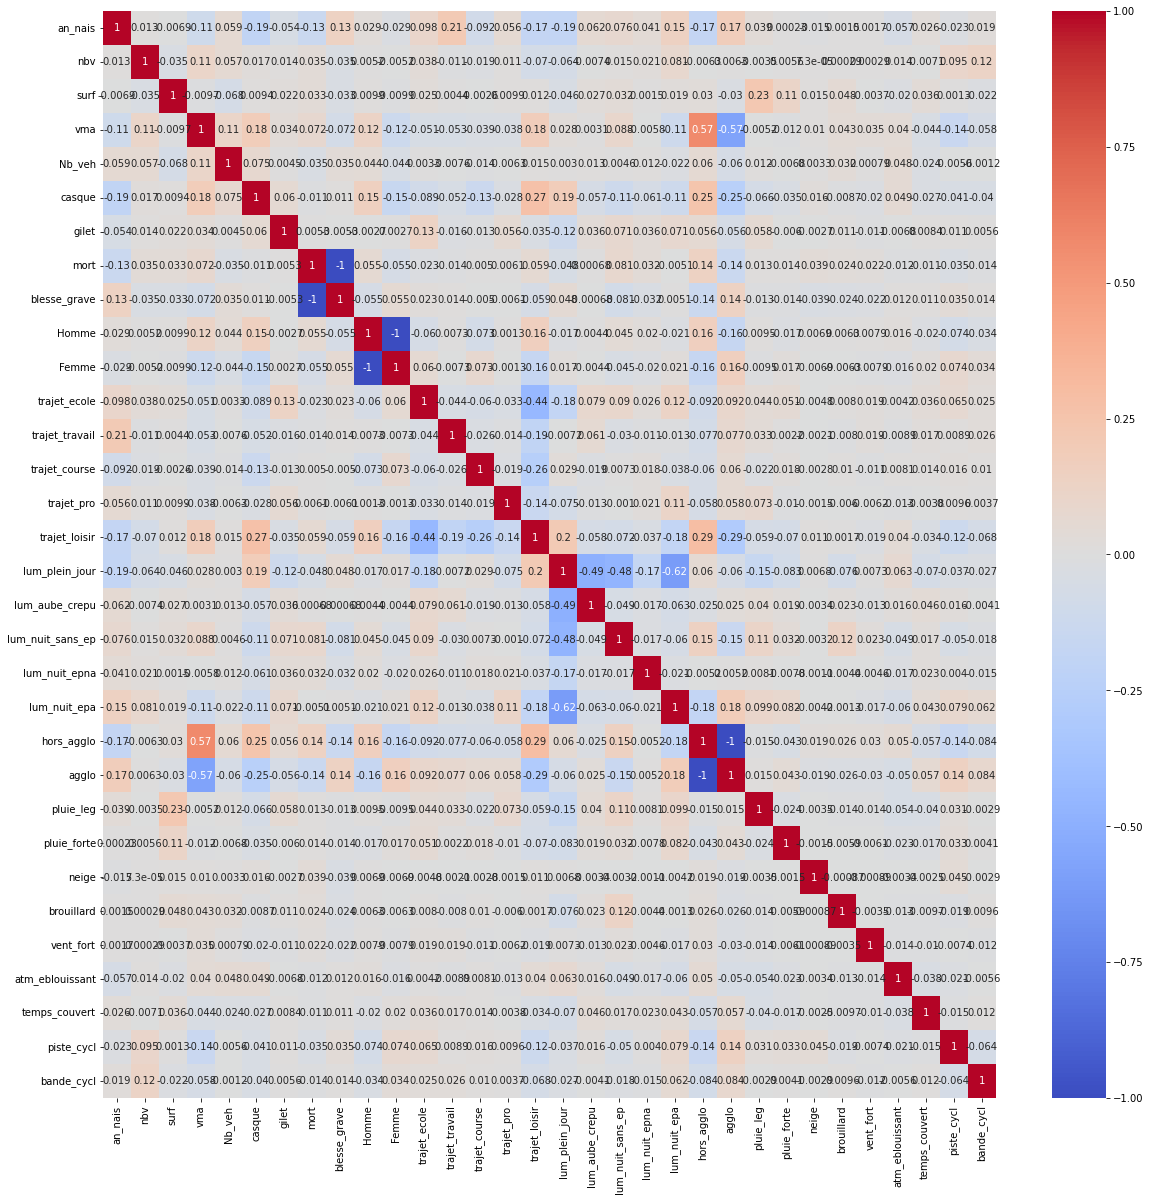

In [377]:
heat_map(accident_grave_df)

In [402]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def airbnb_PCA(df, features, target):
    df.dropna(inplace=True)
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,target].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    # Create the PCA regressor with a maximum number of components
    pca = PCA()
    PrincipalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = PrincipalComponents)
    # Ensure that the PCA values will merge to the target values
    principalDf.index = df.index
    # Concatenante the PCA components values to the target balues
    finalDf = pd.concat([principalDf, pd.Series(df[target])], axis = 1)
    # Create the explained variance
    pca2 = pca.fit(x)
    explained_variance = pca2.explained_variance_ratio_
    print(explained_variance)
    # Plot the cumulative variance to identify optimal n_components
    plt.plot(np.cumsum(pca2.explained_variance_ratio_), linewidth=2)
    plt.xlabel('Components')
    plt.ylabel('Cumulative sum of explained Variances')
    plt.show()


[1.04219633e-01 7.02524852e-02 6.12144020e-02 4.39122307e-02
 4.27453850e-02 4.18366773e-02 3.91892625e-02 3.77070767e-02
 3.70651887e-02 3.52304583e-02 3.48532422e-02 3.43948275e-02
 3.42962477e-02 3.35482573e-02 3.35087472e-02 3.30228523e-02
 3.26185770e-02 3.17831694e-02 3.16257790e-02 3.11960843e-02
 2.99396523e-02 2.66401648e-02 2.49032701e-02 2.28130446e-02
 1.90884407e-02 1.82382759e-02 1.41565683e-02 2.99701896e-32
 8.36283689e-33 1.38897612e-33]


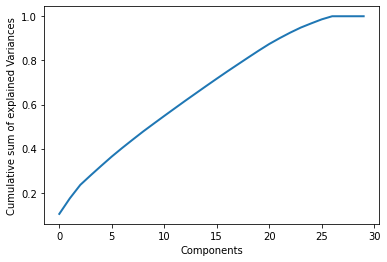

In [430]:

features = ['an_nais', 'nbv', 'surf', 'vma', 'Nb_veh', 
       'casque', 'gilet', 'Homme', 'Femme', 'trajet_ecole', 'trajet_travail', 'trajet_course',
       'trajet_pro', 'trajet_loisir', 'lum_plein_jour', 'lum_aube_crepu',
       'lum_nuit_sans_ep', 'lum_nuit_epna', 'lum_nuit_epa', 'hors_agglo',
       'agglo', 'pluie_leg', 'pluie_forte', 'neige', 'brouillard', 'vent_fort',
       'atm_eblouissant', 'temps_couvert', 'piste_cycl', 'bande_cycl']
#to_drop = ['indemne','blesse_leger','mort','long','lat']
to_drop = ['date']
accident_df = accident_df.drop(to_drop, axis = 1)

airbnb_PCA(accident_df, features, "accident_grave")


In [419]:
accident_df.columns

Index(['an_nais', 'nbv', 'surf', 'vma', 'Nb_veh', 'date', 'casque', 'gilet',
       'blesse_grave', 'Homme', 'Femme', 'trajet_ecole', 'trajet_travail',
       'trajet_course', 'trajet_pro', 'trajet_loisir', 'lum_plein_jour',
       'lum_aube_crepu', 'lum_nuit_sans_ep', 'lum_nuit_epna', 'lum_nuit_epa',
       'hors_agglo', 'agglo', 'pluie_leg', 'pluie_forte', 'neige',
       'brouillard', 'vent_fort', 'atm_eblouissant', 'temps_couvert',
       'piste_cycl', 'bande_cycl'],
      dtype='object')